In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")


In [29]:
rcParams["figure.figsize"] = 15, 5



data = pd.read_excel("Exc.xlsx", index_col=0)
data.index.freq = "Q"


In [50]:
def plotMovingAverage(series, n):

    
    series_train = data[:44]
    series_test =  data[43:]
    rolling_mean = series_train.rolling(window=n).mean()
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", linestyle="dashed", label="Rolling mean trend")
    plt.plot(series_test, color="orange", label="Test")
#color='green', marker='o', linestyle='dashed'

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(series_train[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show(block=False)
    
    #Estimate the Forecast
    print(("RSE: %.4f" % sum((rolling_mean["Umsatz"]-data["Umsatz"])**2)))
    def mape(actual, pred): 
        actual, pred = np.array(actual), np.array(pred)
        return np.mean(np.abs((actual - pred) / actual)) * 100
    print("MAPE: %.4f" % mape(data["Umsatz"], rolling_mean["Umsatz"]))    
    
    print(rolling_mean)

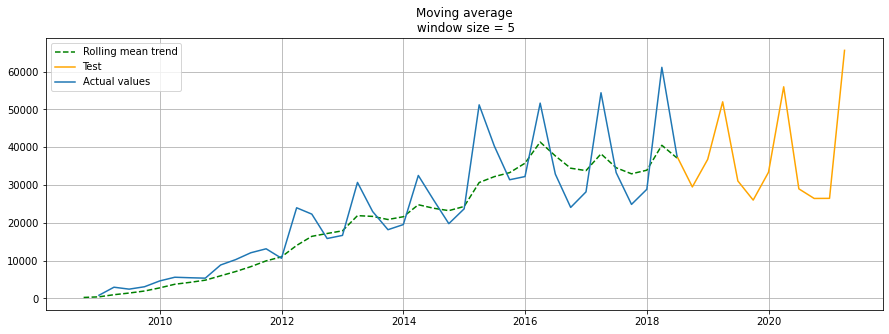

RSE: nan


ValueError: operands could not be broadcast together with shapes (55,) (44,) 

In [56]:
plotMovingAverage(data, 5)

[[718394219, 2013, 1],
 [763723622, 2014, 1],
 [762225057, 2015, 1],
 [787479774, 2016, 1],
 [845614054, 2017, 1]]

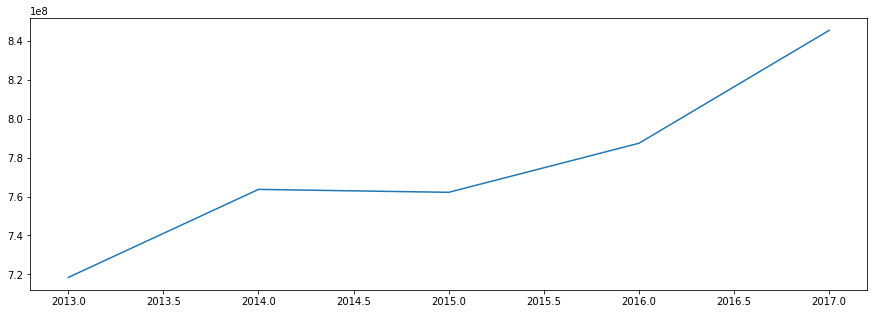

In [15]:
import pylab
from numpy import polyfit, poly1d, linspace
import matplotlib.pyplot as plt


data = [[718394219,   2013 ,   1],
        [763723622,   2014 ,   1],
        [762225057,   2015 ,   1],
        [787479774,   2016 ,   1],
        [845614054,   2017 ,   1]]

values = [i[0] for i in data]
years = [i[1] for i in data]

plt.plot(years, values)
data

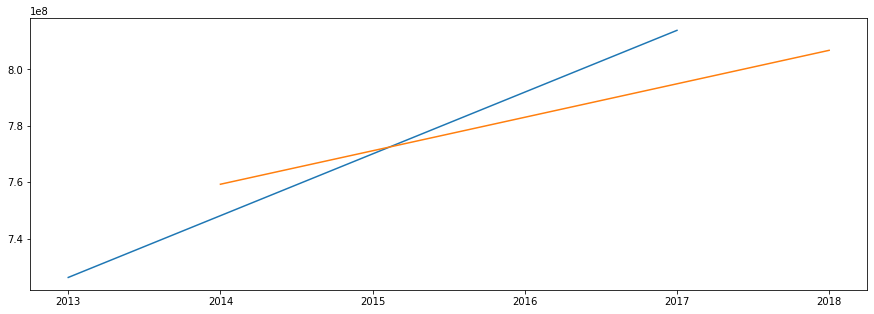

In [14]:
for i in range(0, len(data)-3):
    # interpolate values
    # you can choose for yourself how many point should be taken into account
    # as well as the degree of interpolation (the last variable mentioned)
    z = polyfit(years[i:i+3],values[i:i+3], 1)
    p = poly1d(z)
    # extrapolate interpolation by 1
    start_year = years[i]
    end_year = years[i+3] + 1
    # plot values 
    x = linspace(start_year, end_year, 10)

    y = p(x)
    plt.plot(x, y)

plt.show()

predicted=61.500000, expected=51635.000000
predicted=25876.500000, expected=32857.000000
predicted=42246.000000, expected=24048.000000
predicted=28452.500000, expected=28160.000000
predicted=26104.000000, expected=54378.000000
predicted=41269.000000, expected=33249.000000
predicted=43813.500000, expected=24846.000000
predicted=29047.500000, expected=28846.000000
predicted=26846.000000, expected=61104.000000
predicted=44975.000000, expected=37559.000000
predicted=49331.500000, expected=29470.000000
predicted=33514.500000, expected=36755.000000
predicted=33112.500000, expected=51982.000000
predicted=44368.500000, expected=31051.000000
predicted=41516.500000, expected=25986.000000
predicted=28518.500000, expected=33362.000000
predicted=29674.000000, expected=55957.000000
predicted=44659.500000, expected=28962.000000
predicted=42459.500000, expected=26418.000000
predicted=27690.000000, expected=26444.000000
predicted=26431.000000, expected=65597.000000
Test MSE: 448813093.726


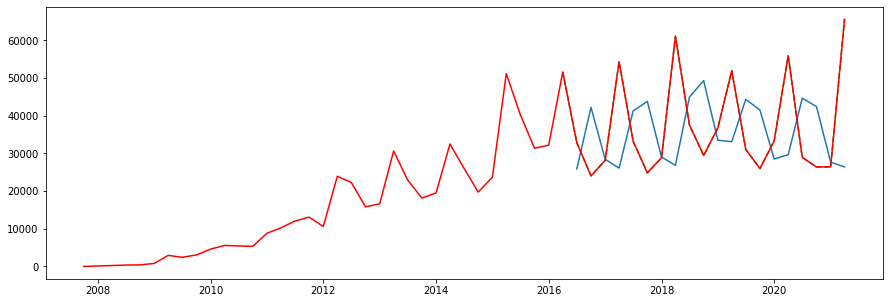

In [108]:

from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# prepare situation
X = data[:34].values
window = 2
history = [X[i] for i in range(window)]
test = data[34:].values
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
  
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
test = pd.DataFrame(test, index = data.index[34:])
pred = pd.DataFrame(predictions[1:], index = data.index[35:])
plt.plot(test, color="green", linestyle="dashed")
plt.plot(pred)
plt.plot(data, color = "red")
